In [1]:
using Distributions
using Plots

# 4.3 離散確率分布

## 4.3.1 ベルヌーイ分布

In [21]:
# 分布を定義する
μ = 0.3
d = Bernoulli(μ)

# サンプル生成
X = rand(d, 10)
X'

1×10 adjoint(::Vector{Bool}) with eltype Bool:
 0  1  1  0  0  0  0  0  0  0

In [22]:
# 1が生成される確率
println(pdf(d, 1))

# 0が生成される確率
println(pdf(d, 0))

# -1が生成される確率
println(pdf(d, -1))

0.3
0.7
0.0


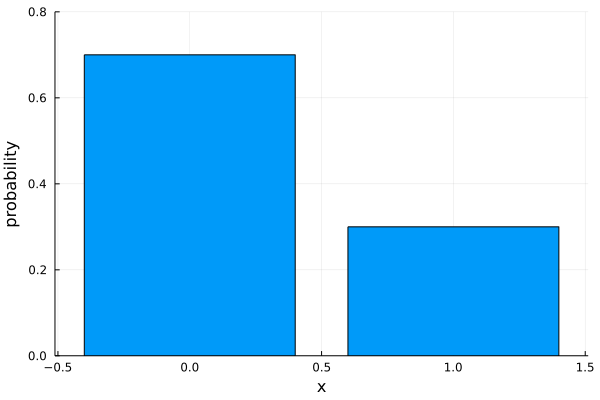

In [23]:
# 実現値に対する確率値
bar([0, 1], pdf.(d, [0, 1]), xlab="x", ylab="probability", label=:none, ylim=(0, 0.8))

## 4.3.2 二項分布

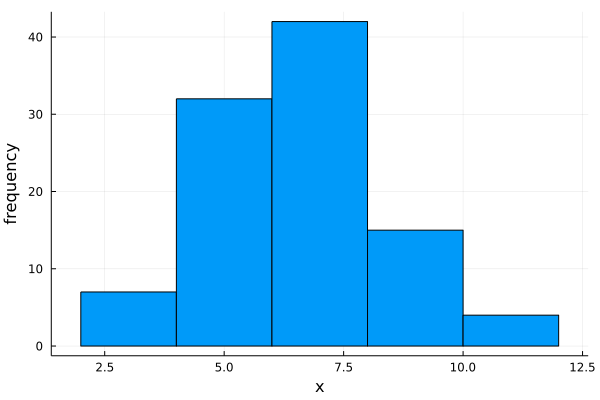

In [24]:
# 分布を定義
n = 20
μ = 0.3
d = Binomial(n, μ)

# サンプル生成
X = rand(d, 100)

# サンプルからヒストグラムを作図
histogram(X, xlab="x", ylab="frequency", label=:none)

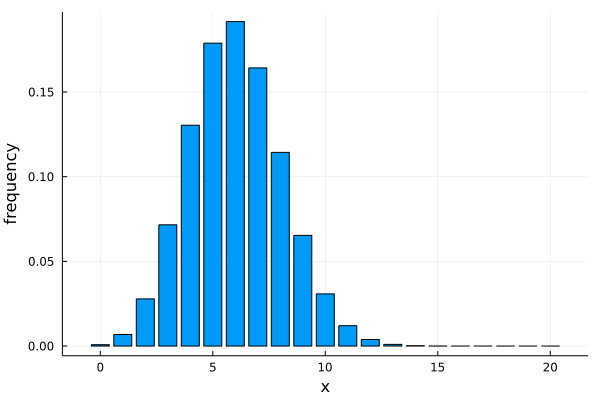

In [25]:
# 確率質量関数から分布を作図
xs = range(0, 20, length=21)
bar(xs, pdf.(d, xs), xlab="x", ylab="frequency", label=:none)

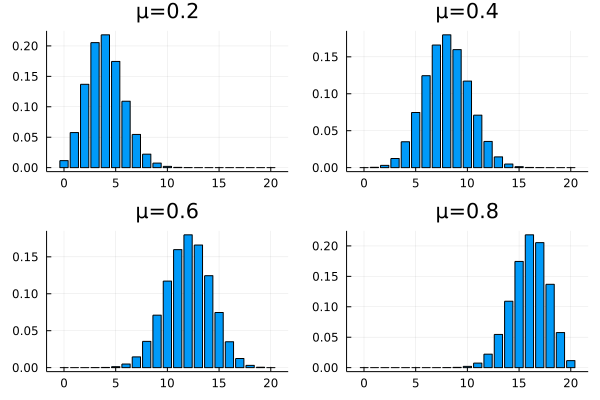

In [39]:
# 平均パラメータを変えた場合の分布を作図
μs = [0.2, 0.4, 0.6, 0.8]
p = []
for i in 1:length(μs)
    μ = μs[i]
    d = Binomial(n, μ)
    push!(p, bar(xs, pdf.(d, xs), title="μ=$(μ)", label=:none))
end
plot(p...)

## 4.3.3 多項分布

In [41]:
# 分布を定義
M = 10
pi = [0.5, 0.3, 0.2]
d = Multinomial(M, pi)

# サンプル生成
X = rand(d, 100)

3×100 Matrix{Int64}:
 6  5  6  6  5  5  4  5  3  3  1  5  6  …  7  5  7  6  3  4  6  6  4  6  5  6
 4  2  1  2  3  3  4  5  3  5  6  3  2     1  4  1  1  4  1  2  1  3  2  5  1
 0  3  3  2  2  2  2  0  4  2  3  2  2     2  1  2  3  3  5  2  3  3  2  0  3

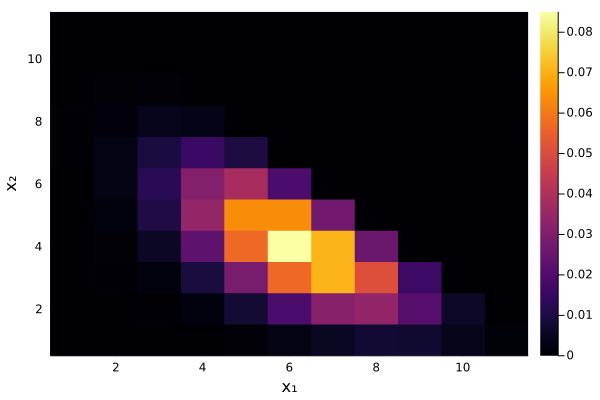

In [46]:
# 確率質量関数から分布を作図
xs = 0:M
heatmap([pdf(d, [x₁, x₂, M - (x₁ + x₂)]) for x₁ in xs, x₂ in xs]', xlab="x₁", ylab="x₂")